<a href="https://colab.research.google.com/github/Murvee/CourseWork/blob/main/TimCourseWorkDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Year    State                Industry            Suspicious Activity  \
0    2018  Alabama  Depository Institution  Automated Clearing House(ACH)   
5    2018  Alabama  Depository Institution  Automated Clearing House(ACH)   
15   2018  Alabama  Depository Institution  Automated Clearing House(ACH)   
19   2018  Alabama  Depository Institution  Automated Clearing House(ACH)   
20   2018  Alabama  Depository Institution  Automated Clearing House(ACH)   
..    ...      ...                     ...                            ...   
355  2018  Arizona  Depository Institution  Automated Clearing House(ACH)   
360  2018  Arizona  Depository Institution  Automated Clearing House(ACH)   
361  2018  Arizona  Depository Institution  Automated Clearing House(ACH)   
362  2018  Arizona  Depository Institution  Automated Clearing House(ACH)   
363  2018  Arizona  Depository Institution                    Advance Fee   

                        Product               Instrument  Count  
0        

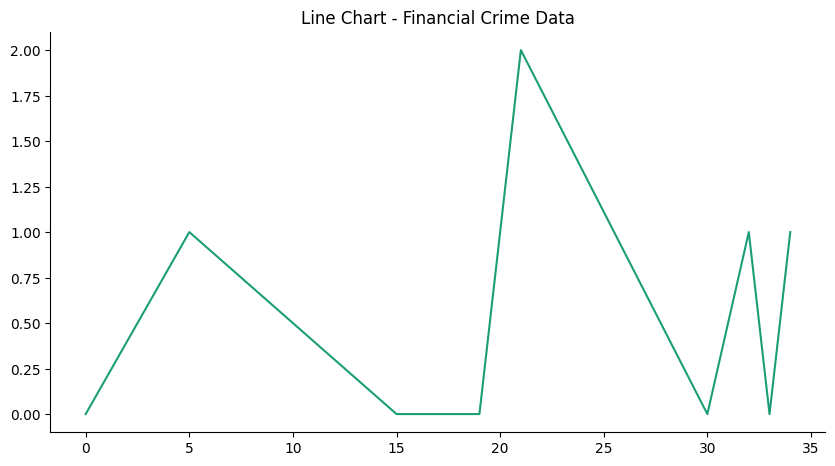

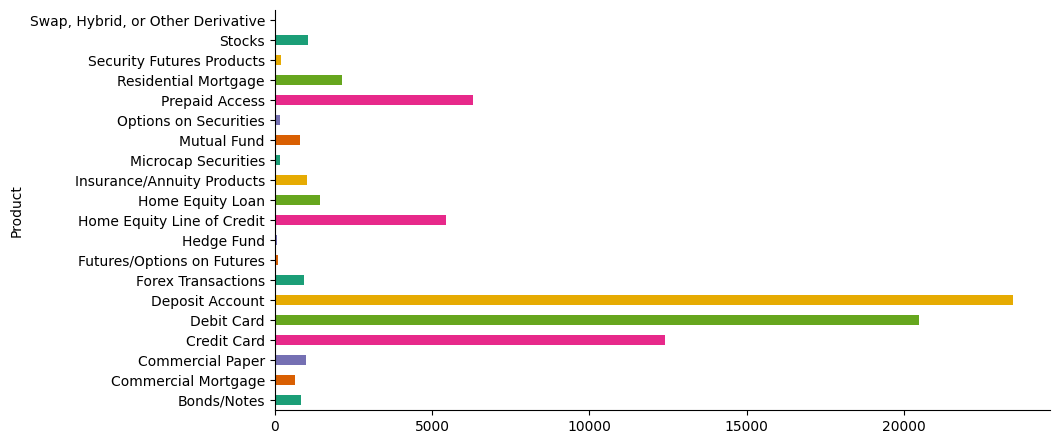

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 20 21:20:22 2023
@author: Timothy M. Zonoe
"""

from google.colab import drive
import pandas as pd
import base64
from matplotlib import pyplot as plt
import seaborn as sns

#Importing the data from my dropbox
df = pd.read_csv('https://www.dropbox.com/scl/fi/ckl1woi3ia798nmndwtcl/FC_Data.csv?rlkey=b1jaew3np8h3j8pn949oweb1g&raw=1')

df = pd.DataFrame(df)
#Droping 'Other' in the product column
df = df[df['Product'] != "Other"]
#Dictionary for replacement or renaming data label in Suspicious Activity
newNames = {'Consumer Loan (see instructions)':'Consumer Loan', 'ACH':'Automated Clearing House(ACH)', 'Wire': 'Wire Transfer','Known or Suspected Terrorist/Terrorist Organization':'Terrorist Link'}
df = df.replace(newNames)

#To process the cleaning on only the financial industry
bk_ind = ['Depository Institution']
df = df[df['Industry'].isin(bk_ind)]

#Checking to make sure the count column is a numeric datatype to avoid a crash.
col_type = df['Count'].dtype
if col_type != 'int64':
    df['Count'] = pd.to_numeric(df['Count'].str.replace(',', ''))


if df['Year'].isin(['All Years [Total]']).any():
    # Removing other string format
    df = df.drop(df[df['Year'] == 'All Years [Total]'].index)
    # Convert 'Year' to datetime format
    df['Year'] = pd.to_datetime(df['Year'], format='%Y') #df['Year'].dtype
    df['Year'] = df.Year.dt.year
    df.set_index('Year')

#This function help to get the top and lowest values base on the number of row input
def GetHighAndLowRows(num, value):
    if num > 0 & value == 1:
        return df.nlargest(num, 'Count')
    elif num > 0 & value == 0:
        return df.nsmallest(num, 'Count')
    else:
        return None


#To use the High/Low function, parse in the input for the two arquments. eg: GetHighAndLowRows(100, 1)
#Value: 0 = Low, 1 = High
#num: number of rows or observations
print(GetHighAndLowRows(100, 1))


#This function help to download the generated file into excel or csv
def DownloadDataFrame(data, fileName, _type):
    dfd = pd.DataFrame(data)
    if dfd.empty:
      print('No data to download!')
    elif fileName != '' and _type == 1:
      dfd.to_excel(fileName +'.xlsx')
    elif fileName != '' and _type == 0:
      dfd.to_csv(fileName +'.csv')
    else:
      print('Unable to download data at the moment, check your iputs!')


DownloadDataFrame(df,'TimCleanFinancialCrimeData',1)

#Calling The High and Low Function to set the values for df_high and df_low variables.
df_high = GetHighAndLowRows(10, 1)
df_low = GetHighAndLowRows(10, 0)

#Grouping the new high dataframe we define by 'State','Suspicious Activity','Product' to perform some system define function like "Mean, Median, Max etc."
dff = df_high.groupby(['State','Suspicious Activity','Product'])

#Visuliztion - Chart & Graph to add some little bit of fun and insight

#Inserting a line graph

df_high.groupby('Product').cumcount().plot(kind='line', figsize=(10, 5.2),title='Line Chart - Financial Crime Data', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

#Inserting a bar graph
df.groupby('Product').size().plot(kind='barh',figsize=(10, 5.2), color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()
